In [1]:
# Import der notwendigen Bibliotheken
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
import numpy as np
import shap

## I) "Matrix"

In [4]:
# Laden des Datensatzes
df_dsc = pd.read_csv("data/010_dsc.csv")
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
269,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.05,147.800,130.5
270,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.09,150.600,130.5
271,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.00,144.900,130.6
272,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.04,133.700,131.2


In [5]:
# Label Encoder für die Zielvariable 'Matrix'
label_encoder = LabelEncoder()
df_dsc['Matrix_encoded'] = label_encoder.fit_transform(df_dsc['Matrix'])

# Eingabemerkmale (Features) und Zielvariable (Target)
X = df_dsc[['dHm_J/g', 'Tm_C']]
y = df_dsc['Matrix_encoded']

In [6]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
feature_names = X.columns
feature_names

Index(['dHm_J/g', 'Tm_C'], dtype='object')

### 1. Logistic Regression

In [8]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")

Logistic Regression Accuracy: 50.91%


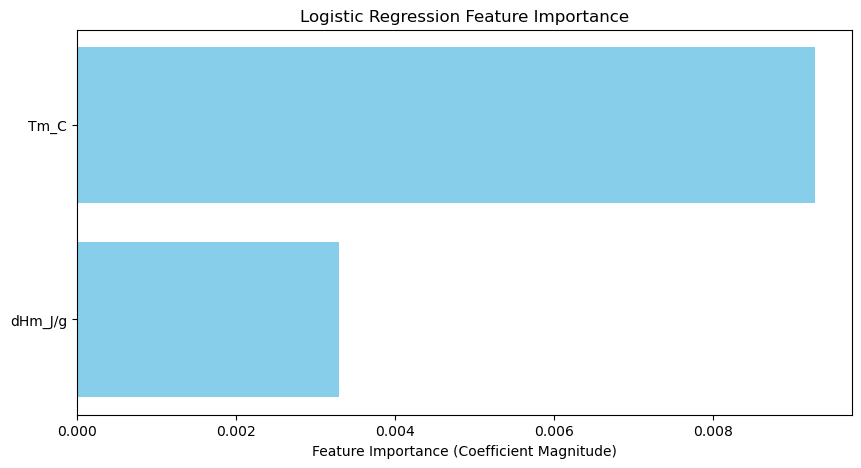

In [9]:
# Koeffizienten als Feature Importances verwenden
importances_log_reg = np.abs(log_reg.coef_[0])  # absolute Werte der Koeffizienten nehmen

# Feature Importances visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_log_reg, color="skyblue")
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Logistic Regression Feature Importance")
plt.show()

### 2. Random Forest Classifier

In [10]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy_random_forest * 100:.2f}%")

Random Forest Accuracy: 74.55%


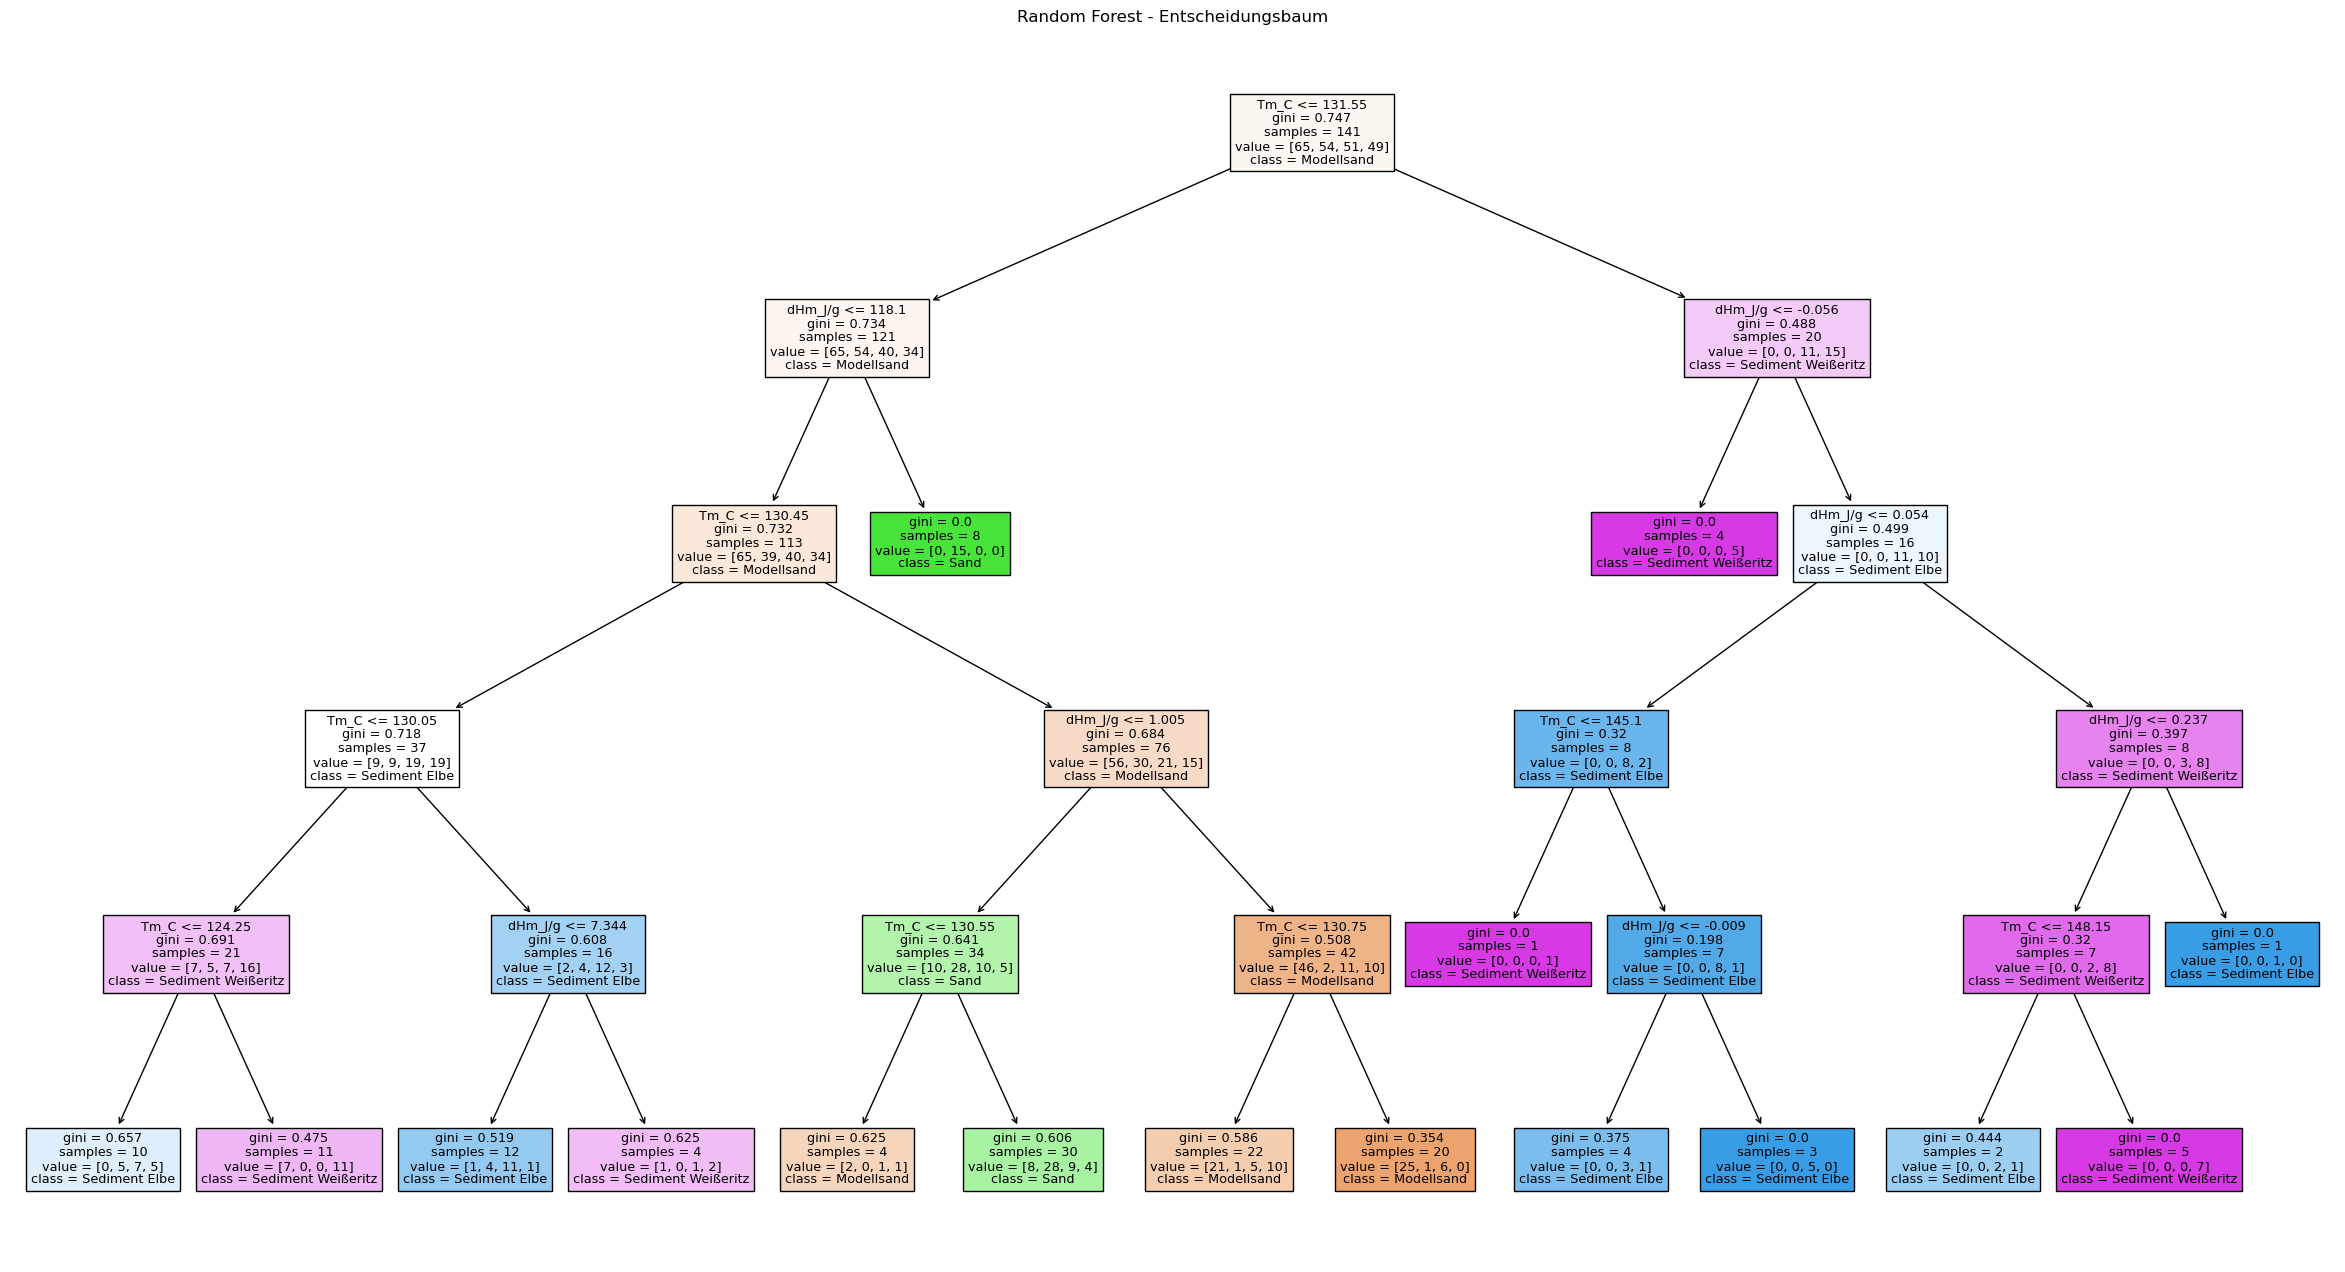

In [11]:
random_tree = random_forest.estimators_[0]  # Den ersten Baum im Wald auswählen
plt.figure(figsize=(30, 16))
plot_tree(random_tree, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.title("Random Forest - Entscheidungsbaum")
plt.show()

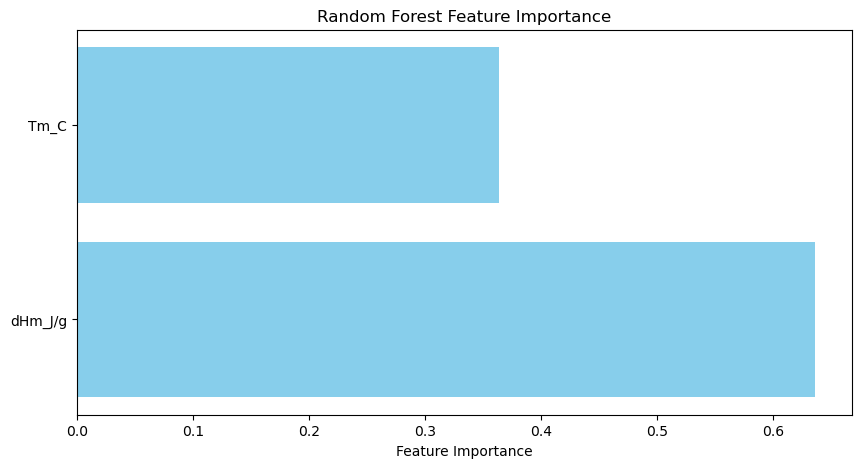

In [12]:
# Feature Importances abrufen
importances_rf = random_forest.feature_importances_

# Feature Importances visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_rf, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

### 3. Gradient Boosting Classifier

In [13]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
print(f"Gradient Boosting Accuracy: {accuracy_gradient_boosting * 100:.2f}%")

Gradient Boosting Accuracy: 67.27%


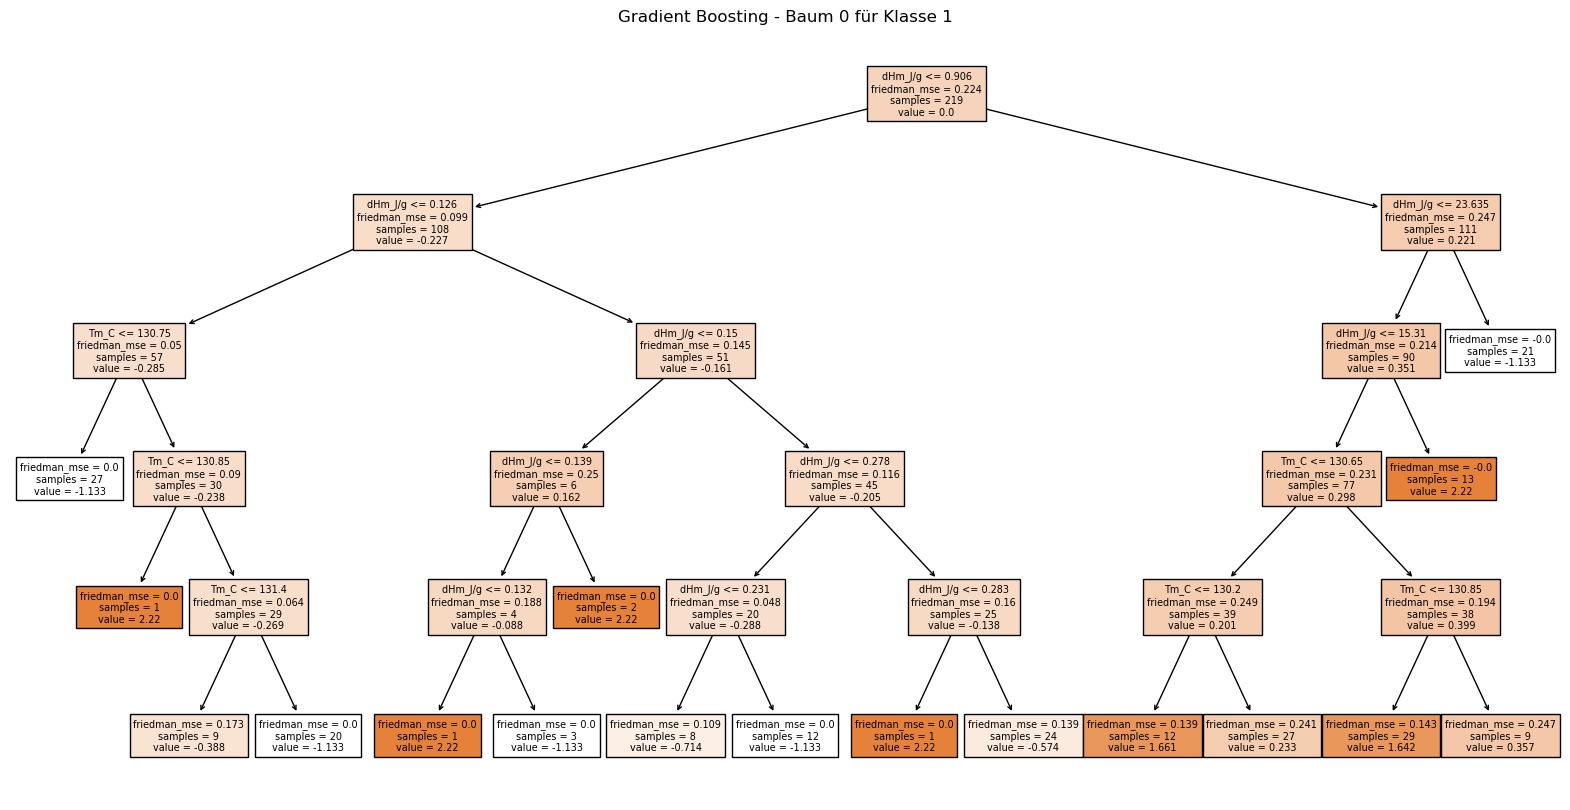

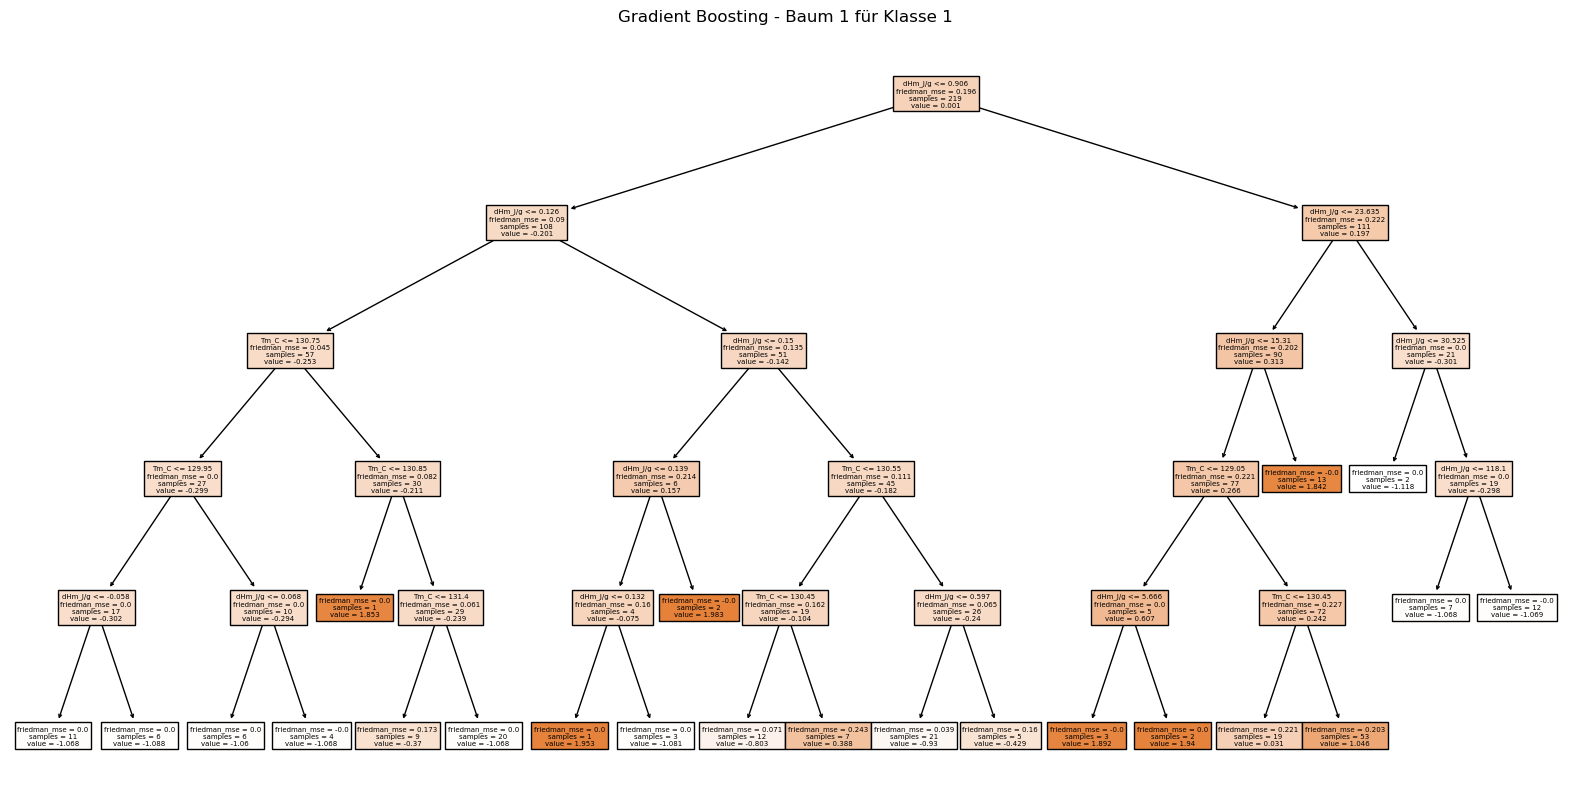

In [14]:
# Visualisierung der zwei ersten Bäume für Klasse 0 im Gradient Boosting Ensemble
for i in range(2):  # Anzahl der Bäume, die du visualisieren möchtest
    plt.figure(figsize=(20, 10))
    plot_tree(gradient_boosting.estimators_[i, 0], feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
    plt.title(f"Gradient Boosting - Baum {i} für Klasse 1")
    plt.show()

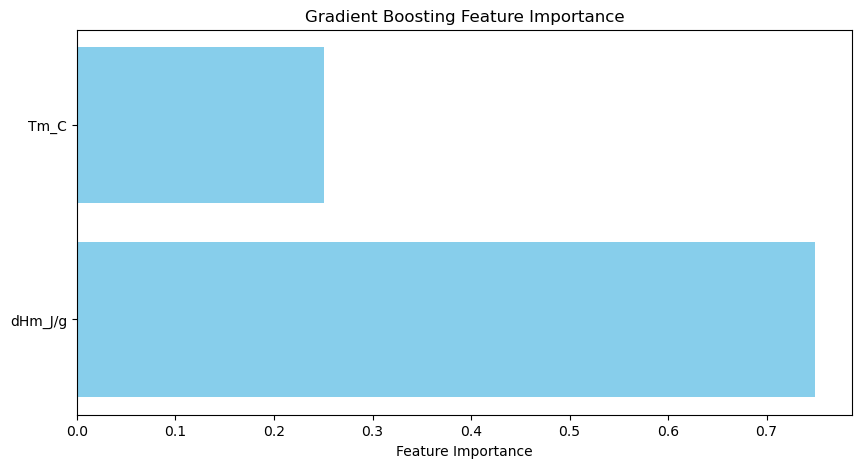

In [15]:
importances = gradient_boosting.feature_importances_
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

### 4. XGBoost Classifier

In [16]:
xgboost_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"XGBoost Accuracy: {accuracy_xgboost * 100:.2f}%")

XGBoost Accuracy: 61.82%


<Figure size 4000x2000 with 0 Axes>

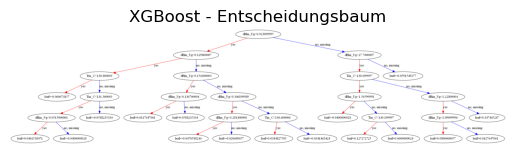

In [17]:
# Visualisierung eines einzelnen Entscheidungsbaums aus XGBoost
plt.figure(figsize=(40, 20))
xgb.plot_tree(xgboost_model, num_trees=0)  # Den ersten Baum von XGBoost auswählen
plt.title("XGBoost - Entscheidungsbaum")
plt.savefig('data/020a_Matrix_xgboost_decision_tree.png', dpi=600)
plt.show()

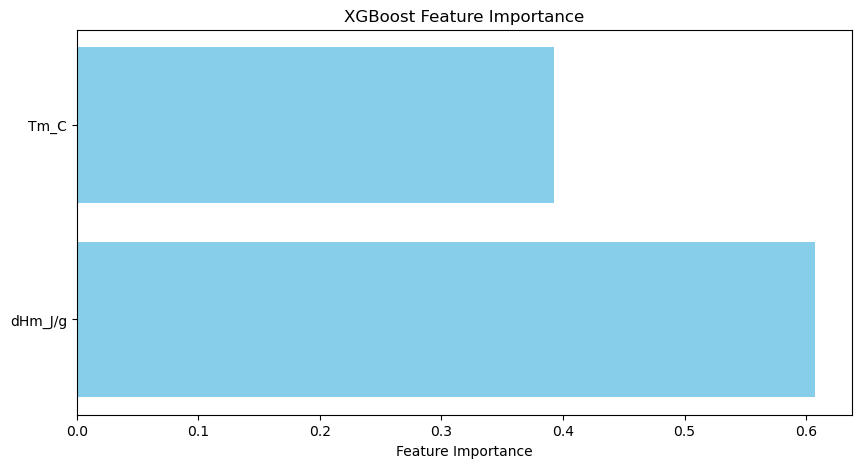

In [18]:
# Feature Importances abrufen
importances_xgboost = xgboost_model.feature_importances_

# Feature Importances visualisieren
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances_xgboost, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

### 5. K-Nearest Neighbors (KNN)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%")

K-Nearest Neighbors Accuracy: 60.00%


### Zusammenfassung der Ergebnisse in einem DataFrame

In [20]:
# Zusammenfassung der Ergebnisse in einem DataFrame
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_log_reg, accuracy_random_forest, accuracy_gradient_boosting, accuracy_xgboost, accuracy_knn]
})

# Sortiere den DataFrame nach Accuracy in absteigender Reihenfolge
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
accuracy_df

,Model,Accuracy
0,Random Forest,0.745455
1,Gradient Boosting,0.672727
2,XGBoost,0.618182
3,K-Nearest Neighbors,0.600000
4,Logistic Regression,0.509091


## II) "Konzentration"

In [21]:
# Laden des Datensatzes
df_dsc = pd.read_csv("data/010_dsc.csv")
df_dsc

,Nummer,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
0,L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
1,L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
2,L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
3,L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
4,L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...
269,L371,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.05,147.800,130.5
270,L372,DS Sand-PE-20ppm-1_2,20,Sand,Polyethylen,NaN,NaN,1.09,150.600,130.5
271,L373,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.00,144.900,130.6
272,L374,DS Sand-PE-20ppm-2_2,20,Sand,Polyethylen,NaN,NaN,1.04,133.700,131.2


In [22]:
# Eingabemerkmale (Features) und Zielvariable (Target)
X = df_dsc[['dHm_J/g', 'Tm_C']]
y = df_dsc['Konzentration_ppm']  # Setze die Zielvariable auf 'Konzentration_ppm'

In [23]:
# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear Regression

In [24]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.2f}")

Linear Regression MSE: 1018.74


In [25]:
r2_score_lin = linear_regressor.score(X_test, y_test)
print(f"R²-Wert: {r2_score_lin}")  # 0 schlecht; 1 perfekt

R²-Wert: 0.04051262952361967


### 2. Random Forest Classifier

In [26]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf:.2f}")

Random Forest Regression MSE: 718.60


In [27]:
r2_score_rf = random_forest_regressor.score(X_test, y_test)
print(f"R²-Wert: {r2_score_rf}")  # 0 schlecht; 1 perfekt

R²-Wert: 0.3231924563542261


### 3. Gradient Boosting Regressor

In [28]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gradient_boosting_regressor.fit(X_train, y_train)
y_pred_gb = gradient_boosting_regressor.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Regression MSE: {mse_gb:.2f}")

Gradient Boosting Regression MSE: 798.54


In [29]:
r2_score_gb = gradient_boosting_regressor.score(X_test, y_test)
print(f"R²-Wert: {r2_score_gb}")  # 0 schlecht; 1 perfekt

R²-Wert: 0.24790123942764808


### 4. XGBoost Regressor

In [30]:
xgboost_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgboost_regressor.fit(X_train, y_train)
y_pred_xgb = xgboost_regressor.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost Regression MSE: {mse_xgb:.2f}")

XGBoost Regression MSE: 772.89


In [31]:
r2_score_xgb = xgboost_regressor.score(X_test, y_test)
print(f"R²-Wert: {r2_score_xgb}")  # 0 schlecht; 1 perfekt

R²-Wert: 0.27206390091888755


### 5. K-Nearest Neighbors Regressor

In [32]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Regression MSE: {mse_knn:.2f}")

K-Nearest Neighbors Regression MSE: 816.14


In [33]:
r2_score_knn = knn_regressor.score(X_test, y_test)
print(f"R²-Wert: {r2_score_knn}")  # 0 schlecht; 1 perfekt

R²-Wert: 0.2313284372271781


### Zusammenfassung der Ergebnisse in einem DataFrame

In [34]:
# Zusammenfassung der Ergebnisse für MSE und MAE in einem DataFrame
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'K-Nearest Neighbors'],
    'MSE': [mse_linear, mse_rf, mse_gb, mse_xgb, mse_knn],
    'R²': [r2_score_lin, r2_score_rf, r2_score_gb, r2_score_xgb, r2_score_knn]
})

# Sortiere den DataFrame nach MSE aufsteigend (geringer MSE ist besser)
results_df = results_df.sort_values(by='MSE').reset_index(drop=True)
results_df

,Model,MSE,R²
0,Random Forest,718.602703,0.323192
1,XGBoost,772.888620,0.272064
2,Gradient Boosting,798.543407,0.247901
3,K-Nearest Neighbors,816.139636,0.231328
4,Linear Regression,1018.738967,0.040513


> alles schlecht